In [51]:
import numpy as np
import os, sys
from scipy.sparse import load_npz
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [52]:
root = 'data'
folders = os.listdir(root)
df = pd.DataFrame()

In [53]:
pairs = []
gt_idzs = []

for folder in folders:
    npz = [os.path.join(file) for file in  os.listdir(os.path.join(root, folder, 'processed', 'matching')) if file.endswith('npz') and 'hybrid_pillar' in file]
    gt = [load_npz(os.path.join(root, folder,'processed', 'matching',item)).toarray() for item in npz]
    pair = [(item.split('.')[0].split('_')[-1], item.split('.')[0].split('_')[-2]) for item in npz]
    gt_idx = []
    for gtasg in gt:
        gt_matches0 = np.zeros(gtasg.shape[0]) - 1
        for i, kpts_j in enumerate(gtasg):
            for j, match in enumerate(kpts_j):
                # if there is a match (1) then the keypoint in index i
                # matches to the keypoint in index j of the other fragment
                if match:
                    gt_matches0[i] = j
        gt_idx.append(gt_matches0)
    pairs.append(pair)
    gt_idzs.append(gt_idx)

#PILLAR

In [54]:
kpts_pillar = []
rand_pillar = []

for idx, pair in enumerate(pairs):
    for item in pair:
        index = int(item[0])
        frag_kpts = gt_idzs[idx][index]
        pair = item
        desc_0 = np.load(os.path.join('data', folders[idx], 'processed', 'pillar_keypoint_descriptors', f'keypoint_descriptors_hybrid_pillar.{pair[0]}.npy'))
        desc_1 = np.load(os.path.join('data', folders[idx], 'processed', 'pillar_keypoint_descriptors', f'keypoint_descriptors_hybrid_pillar.{pair[1]}.npy'))
        descriptor_pairs = []
        pair_indizes = []

        for i, j in enumerate(frag_kpts):
            # match if its greater than -1
            if j > -1:
                descriptor_pairs.append((desc_0[i], desc_1[int(j)]))
                pair_indizes.append((i,j))
                pair_indizes.append((j,i))

        pair_indizes = np.array(pair_indizes)
        descriptor_pairs = np.array(descriptor_pairs)

        # normal ones
        corr_kpts = []
        for pair in descriptor_pairs:
            m1 = pair[0].ravel()
            m2 = pair[1].ravel()
            corr_kpts.append(np.corrcoef(m1, m2)[0,1])
        corr_kpts = np.array(corr_kpts)

        # random ones
        # generate random samples of descriptor pairs which are not a match
        descriptor_pairs_random = []
        while len(descriptor_pairs_random) < len(descriptor_pairs):
            i = np.random.randint(512)
            j = np.random.randint(512)
            if (i,j) not in pair_indizes:
                descriptor_pairs_random.append((desc_0[i], desc_1[int(j)]))  

        descriptor_pairs_random = np.array(descriptor_pairs_random)
        corr_kpts_rand = []
        for pair in descriptor_pairs_random:
            m1 = pair[0].ravel()
            m2 = pair[1].ravel()
            corr_kpts_rand.append(np.corrcoef(m1, m2)[0,1])
        corr_kpts_rand = np.array(corr_kpts_rand)
        kpts_pillar.append(np.mean(corr_kpts))
        rand_pillar.append(np.mean(corr_kpts_rand))

#FPFH

In [55]:
kpts_fpfh = []
rand_fpfh = []

for idx, pair in enumerate(pairs):
    for item in pair:
        index = int(item[0])
        frag_kpts = gt_idzs[idx][index]
        pair = item
        desc_0 = np.load(os.path.join('data', folders[idx], 'processed', 'keypoint_descriptors', f'keypoint_descriptors_hybrid_fpfh.{pair[0]}.npy'))
        desc_1 = np.load(os.path.join('data', folders[idx], 'processed', 'keypoint_descriptors', f'keypoint_descriptors_hybrid_fpfh.{pair[1]}.npy'))
        descriptor_pairs = []
        pair_indizes = []

        for i, j in enumerate(frag_kpts):
            # match if its greater than -1
            if j > -1:
                descriptor_pairs.append((desc_0[i], desc_1[int(j)]))
                pair_indizes.append((i,j))
                pair_indizes.append((j,i))

        pair_indizes = np.array(pair_indizes)
        descriptor_pairs = np.array(descriptor_pairs)

        # normal ones
        corr_kpts = []
        for pair in descriptor_pairs:
            m1 = pair[0].ravel()
            m2 = pair[1].ravel()
            corr_kpts.append(np.corrcoef(m1, m2)[0,1])
        corr_kpts = np.array(corr_kpts)

        # random ones
        # generate random samples of descriptor pairs which are not a match
        descriptor_pairs_random = []
        while len(descriptor_pairs_random) < len(descriptor_pairs):
            i = np.random.randint(512)
            j = np.random.randint(512)
            if (i,j) not in pair_indizes:
                descriptor_pairs_random.append((desc_0[i], desc_1[int(j)]))  


        descriptor_pairs_random = np.array(descriptor_pairs_random)
        corr_kpts_rand = []
        for pair in descriptor_pairs_random:
            m1 = pair[0]
            m2 = pair[1]
            corr_kpts_rand.append(np.corrcoef(m1, m2)[0,1])
        corr_kpts_rand = np.array(corr_kpts_rand)
        kpts_fpfh.append(np.mean(corr_kpts))
        rand_fpfh.append(np.mean(corr_kpts_rand))

#FPFH Inverted

In [56]:
kpts_fpfh_inv = []
rand_fpfh_inv = []

for idx, pair in enumerate(pairs):
    for item in pair:
        index = int(item[0])
        frag_kpts = gt_idzs[idx][index]
        pair = item
        desc_0 = np.load(os.path.join('data', folders[idx], 'processed', 'keypoint_descriptors', f'keypoint_descriptors_hybrid_fpfh.{pair[0]}.npy'))
        desc_1 = np.load(os.path.join('data', folders[idx], 'processed', 'keypoint_descriptors_inverted', f'keypoint_descriptors_hybrid_fpfh.{pair[1]}.npy'))
        descriptor_pairs = []
        pair_indizes = []

        for i, j in enumerate(frag_kpts):
            # match if its greater than -1
            if j > -1:
                descriptor_pairs.append((desc_0[i], desc_1[int(j)]))
                pair_indizes.append((i,j))
                pair_indizes.append((j,i))

        pair_indizes = np.array(pair_indizes)
        descriptor_pairs = np.array(descriptor_pairs)

        # normal ones
        corr_kpts = []
        for pair in descriptor_pairs:
            m1 = pair[0].ravel()
            m2 = pair[1].ravel()
            corr_kpts.append(np.corrcoef(m1, m2)[0,1])
        corr_kpts = np.array(corr_kpts)

        # random ones
        # generate random samples of descriptor pairs which are not a match
        descriptor_pairs_random = []
        while len(descriptor_pairs_random) < len(descriptor_pairs):
            i = np.random.randint(512)
            j = np.random.randint(512)
            if (i,j) not in pair_indizes:
                descriptor_pairs_random.append((desc_0[i], desc_1[int(j)]))  


        descriptor_pairs_random = np.array(descriptor_pairs_random)
        corr_kpts_rand = []
        for pair in descriptor_pairs_random:
            m1 = pair[0]
            m2 = pair[1]
            corr_kpts_rand.append(np.corrcoef(m1, m2)[0,1])
        corr_kpts_rand = np.array(corr_kpts_rand)
        kpts_fpfh_inv.append(np.mean(corr_kpts))
        rand_fpfh_inv.append(np.mean(corr_kpts_rand))


#SHOT

In [57]:
kpts_shot = []
rand_shot = []

for idx, pair in enumerate(pairs):

    for item in pair:
        index = int(item[0])
        frag_kpts = gt_idzs[idx][index]
        pair = item
        try:
            desc_0 = np.load(os.path.join('data', folders[idx], 'processed', 'keypoint_descriptors', f'keypoint_descriptors_hybrid_shot.{pair[0]}.npy'))
            desc_1 = np.load(os.path.join('data', folders[idx], 'processed', 'keypoint_descriptors', f'keypoint_descriptors_hybrid_shot.{pair[1]}.npy'))
        except:
            continue
        descriptor_pairs = []
        pair_indizes = []

        for i, j in enumerate(frag_kpts):
            # match if its greater than -1
            if j > -1:
                descriptor_pairs.append((desc_0[i], desc_1[int(j)]))
                pair_indizes.append((i,j))
                pair_indizes.append((j,i))

        pair_indizes = np.array(pair_indizes)
        descriptor_pairs = np.array(descriptor_pairs)

        # normal ones
        corr_kpts = []
        for pair in descriptor_pairs:
            m1 = pair[0].ravel()
            m2 = pair[1].ravel()
            corr_kpts.append(np.corrcoef(m1, m2)[0,1])
        corr_kpts = np.array(corr_kpts)

        # random ones
        # generate random samples of descriptor pairs which are not a match
        descriptor_pairs_random = []
        while len(descriptor_pairs_random) < len(descriptor_pairs):
            i = np.random.randint(512)
            j = np.random.randint(512)
            if (i,j) not in pair_indizes:
                descriptor_pairs_random.append((desc_0[i], desc_1[int(j)]))  


        descriptor_pairs_random = np.array(descriptor_pairs_random)
        corr_kpts_rand = []
        for pair in descriptor_pairs_random:
            m1 = pair[0]
            m2 = pair[1]
            corr_kpts_rand.append(np.corrcoef(m1, m2)[0,1])
        corr_kpts_rand = np.array(corr_kpts_rand)
        kpts_shot.append(np.mean(corr_kpts))
        rand_shot.append(np.mean(corr_kpts_rand))

In [58]:
data = [kpts_fpfh, rand_fpfh, kpts_fpfh_inv, rand_fpfh_inv, kpts_pillar, rand_pillar, kpts_shot, rand_shot]
labels = ['Kpts', 'Random']*4

In [74]:
import matplotlib.patches as mpatches
colors = ['blue']*2 + ['lightblue']*2 + ['lightgreen']*2 + ['lightgray']*2
p1 = mpatches.Patch(color='blue', label='FPFH')
p2 = mpatches.Patch(color='lightblue', label='FPFH with pairwise inverted normals')
p3 = mpatches.Patch(color='lightgreen', label='StickyPillars but with a Sphere')
p4 = mpatches.Patch(color='lightgray', label='SHOT')
patches = [p1, p2, p3, p4]

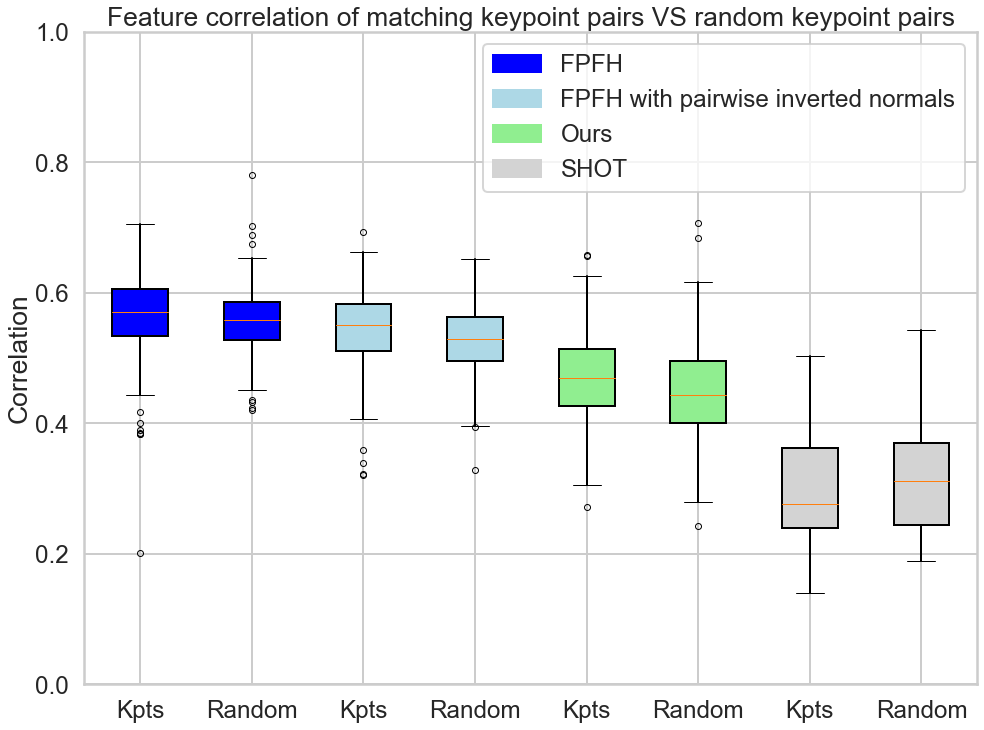

In [73]:


fig1, ax1 = plt.subplots(figsize=(16,12))
ax1.set_title('Feature correlation of matching keypoint pairs VS random keypoint pairs')
bp1 = ax1.boxplot(data, patch_artist=True, labels=labels)
ax1.set_ylim([0,1])
#ax1.grid(color='grey', axis='y', linestyle='-', linewidth=0.5, alpha=0.5)
ax1.set_ylabel("Correlation")


for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_linewidth(2)

for patch in bp1['whiskers']:
    patch.set_linewidth(2)

plt.legend(handles=patches)
sb.set_context("poster", font_scale=1.1, rc={"lines.linewidth": 2})

plt.savefig('boxplot.png',dpi=600,bbox_inches='tight')